<a href="https://colab.research.google.com/github/diegonogare/MachineLearning/blob/main/Classificacao_KNN_Dataset_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de Classificação - KNN - Dataset Fraud Detection

Este dataset é encontrado originalmente na competição do Kaggle
https://www.kaggle.com/datasets/whenamancodes/fraud-detection


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/diegonogare/MachineLearning/main/creditcard.csv")

In [3]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df2 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18','Class']]

corr = df2.corr()
corr.style.background_gradient()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
V3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.192961
V4,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.133447
V7,0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.187257
V10,0.000000,0.000000,-0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.216883
V11,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154876
V12,0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.260593
V14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.302544
V16,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,-0.000000,-0.196539
V17,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,-0.326481
V18,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,-0.111485


In [5]:
X = df2.drop(['Class'], axis = 1)
Y = df2[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [15]:
predicao = modelo_knn.predict(X_test)
print(predicao)

[1 0 0 ... 0 0 0]


[[56860     4]
 [   21    77]]


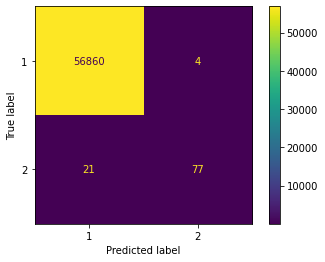

In [21]:
matriz_confusao = confusion_matrix(y_test, predicao)
print(matriz_confusao)

matriz_confusao_visual = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao,display_labels = np.array([1,2]))
matriz_confusao_visual.plot();
